In [30]:
from rocketpy import Environment, SolidMotor, Rocket, Flight
import datetime

%matplotlib notebook
%matplotlib inline

In [34]:
help(Environment)

Help on class Environment in module rocketpy.Environment:

class Environment(builtins.object)
 |  Keeps all environment information stored, such as wind and temperature
 |  conditions, as well as gravity and rail length.
 |  
 |  Attributes
 |  ----------
 |  
 |      Constants
 |      Environment.earthRadius : float
 |          Value of Earth's Radius = 6.3781e6 m.
 |      Environment.airGasConstant : float
 |          Value of Air's Gas Constant = 287.05287 J/K/Kg
 |  
 |      Gravity and Launch Rail Length:
 |      Environment.rl : float
 |          Launch rail length in meters.
 |      Environment.g : float
 |          Positive value of gravitational acceleration in m/s^2.
 |  
 |      Coordinates and Date:
 |      Environment.lat : float
 |          Launch site latitude.
 |      Environment.lon : float
 |          Launch site longitude.
 |      Environment.datum: string
 |          The desired reference ellipsoide model, the following options are
 |          available: "SAD69", "W

In [35]:
# Tomorrow's datetime
datetime.datetime.today() + datetime.timedelta(days=1)

datetime.datetime(2022, 3, 15, 22, 4, 53, 189514)

In [33]:
Env = Environment(
    railLength=5.2,
    longitude=37.0144, # East
    latitude=-1.1018, # South
    elevation=1519, # Altitude
)

tomorrow = datetime.datetime.today() + datetime.timedelta(days=1)

Env.setDate((tomorrow.year, tomorrow.month, tomorrow.day, 12)) 

Env.setAtmosphericModel(type='Forecast', file='GFS')

Launch Site Details

Launch Rail Length: 5.2  m
Launch Date: 2022-03-15 12:00:00 UTC
Launch Site Latitude: -1.10180°
Launch Site Longitude: 37.01440°
Reference Datum: SIRGAS2000
Launch Site UTM coordinates: 946988.23 E    9877916.36 S
Launch Site UTM zone: 36M
Launch Site Surface Elevation: 1553.5 m


Atmospheric Model Details

Atmospheric Model Type: Forecast
Forecast Maximum Height: 80.070 km
Forecast Time Period: From  2022-03-14 12:00:00  to  2022-03-30 12:00:00  UTC
Forecast Hour Interval: 3  hrs
Forecast Latitude Range: From  -90.0 ° To  90.0 °
Forecast Longitude Range: From  0.0 ° To  359.75 °


Surface Atmospheric Conditions

Surface Wind Speed: 5.61 m/s
Surface Wind Direction: 78.12°
Surface Wind Heading: 258.12°
Surface Pressure: 841.62 hPa
Surface Temperature: 302.31 K
Surface Air Density: 0.970 kg/m³
Surface Speed of Sound: 348.55 m/s


Atmospheric Model Plots


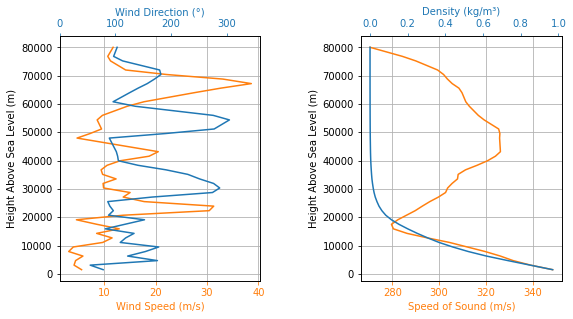

In [36]:
Env.info()

In [40]:
help(SolidMotor)

Help on class SolidMotor in module rocketpy.SolidMotor:

class SolidMotor(builtins.object)
 |  Class to specify characteristics and useful operations for solid
 |  motors.
 |  
 |  Attributes
 |  ----------
 |  
 |      Geometrical attributes:
 |      Motor.nozzleRadius : float
 |          Radius of motor nozzle outlet in meters.
 |      Motor.throatRadius : float
 |          Radius of motor nozzle throat in meters.
 |      Motor.grainNumber : int
 |          Number of solid grains.
 |      Motor.grainSeparation : float
 |          Distance between two grains in meters.
 |      Motor.grainDensity : float
 |          Density of each grain in kg/meters cubed.
 |      Motor.grainOuterRadius : float
 |          Outer radius of each grain in meters.
 |      Motor.grainInitialInnerRadius : float
 |          Initial inner radius of each grain in meters.
 |      Motor.grainInitialHeight : float
 |          Initial height of each grain in meters.
 |      Motor.grainInitialVolume : float
 |     

In [77]:
motor = SolidMotor(
    thrustSource="march_03.csv",
    burnOut=3,
    grainNumber=1,
    grainSeparation=0.001,
    grainDensity=500,
    grainOuterRadius=0.05,
    grainInitialInnerRadius=0.019,
    grainInitialHeight=0.106,
    nozzleRadius=0.025,
    throatRadius=0.012
)


Motor Details
Total Burning Time: 3 s
Total Propellant Mass: 0.356 kg
Propellant Exhaust Velocity: 563.257 m/s
Average Thrust: 66.869 N
Maximum Thrust: 159.409557 N at 1.35 s after ignition.
Total Impulse: 200.606 Ns

Plots


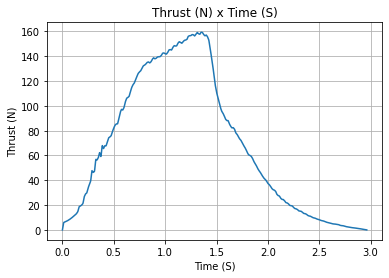

In [83]:
motor.info()

In [78]:
help(Rocket)

Help on class Rocket in module rocketpy.Rocket:

class Rocket(builtins.object)
 |  Keeps all rocket and parachute information.
 |  
 |  Attributes
 |  ----------
 |      Geometrical attributes:
 |      Rocket.radius : float
 |          Rocket's largest radius in meters.
 |      Rocket.area : float
 |          Rocket's circular cross section largest frontal area in squared
 |          meters.
 |      Rocket.distanceRocketNozzle : float
 |          Distance between rocket's center of mass, without propellant,
 |          to the exit face of the nozzle, in meters. Always positive.
 |      Rocket.distanceRocketPropellant : float
 |          Distance between rocket's center of mass, without propellant,
 |          to the center of mass of propellant, in meters. Always positive.
 |  
 |      Mass and Inertia attributes:
 |      Rocket.mass : float
 |          Rocket's mass without propellant in kg.
 |      Rocket.inertiaI : float
 |          Rocket's moment of inertia, without propellant, wi

In [84]:
Calisto = Rocket(
    motor=motor,
    radius=0.06,
    mass=3,
    inertiaI=6.60,
    inertiaZ=0.0351,
    distanceRocketNozzle=-1.255,
    distanceRocketPropellant=-0.85704,
    powerOffDrag=0.7,
    powerOnDrag=0.7
)

Calisto.setRailButtons([0.2, -0.5])

In [85]:
NoseCone = Calisto.addNose(length=0.55829, kind="vonKarman", distanceToCM=0.71971)

FinSet = Calisto.addFins(
    4, span=0.100, rootChord=0.120, tipChord=0.040, distanceToCM=-1.04956
)

Tail = Calisto.addTail(
    topRadius=0.0635, bottomRadius=0.0435, length=0.060, distanceToCM=-1.194656
)

In [86]:
def drogueTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate drogue when vz < 0 m/s.
    return True if y[5] < 0 else False


def mainTrigger(p, y):
    # p = pressure
    # y = [x, y, z, vx, vy, vz, e0, e1, e2, e3, w1, w2, w3]
    # activate main when vz < 0 m/s and z < 800 m.
    return True if y[5] < 0 and y[2] < 800 else False

# Calisto.parachutes.remove(Drogue)
# Calisto.parachutes.remove(Main)

Main = Calisto.addParachute(
    "Main",
    CdS=10.0,
    trigger=mainTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

Drogue = Calisto.addParachute(
    "Drogue",
    CdS=1.0,
    trigger=drogueTrigger,
    samplingRate=105,
    lag=1.5,
    noise=(0, 8.3, 0.5),
)

In [87]:
TestFlight = Flight(rocket=Calisto, environment=Env, inclination=85, heading=0)

Initial Conditions

Position - x: 0.00 m | y: 0.00 m | z: 1553.46 m
Velocity - Vx: 0.00 m/s | Vy: 0.00 m/s | Vz: 0.00 m/s
Attitude - e0: 0.999 | e1: -0.044 | e2: -0.000 | e3: 0.000
Euler Angles - Spin φ : 0.00° | Nutation θ: -5.00° | Precession ψ: 0.00°
Angular Velocity - ω1: 0.00 rad/s | ω2: 0.00 rad/s| ω3: 0.00 rad/s


Launch Rail Orientation

Launch Rail Inclination: 85.00°
Launch Rail Heading: 0.00°


Surface Wind Conditions

Frontal Surface Wind Speed: -1.17 m/s
Lateral Surface Wind Speed: 5.48 m/s


 Rail Departure State

Rail Departure Time: 0.970 s
Rail Departure Velocity: 14.574 m/s
Rail Departure Static Margin: 3.152 c
Rail Departure Angle of Attack: 20.933°
Rail Departure Thrust-Weight Ratio: 4.484
Rail Departure Reynolds Number: 9.845e+04


BurnOut State

BurnOut time: 3.000 s
Altitude at burnOut: 71.845 m (AGL)
Rocket velocity at burnOut: 31.912 m/s
Freestream velocity at burnOut: 32.733 m/s
Mach Number at burnOut: 0.094
Kinetic energy at burnOut: 1.528e+03 J


Apogee

Apo

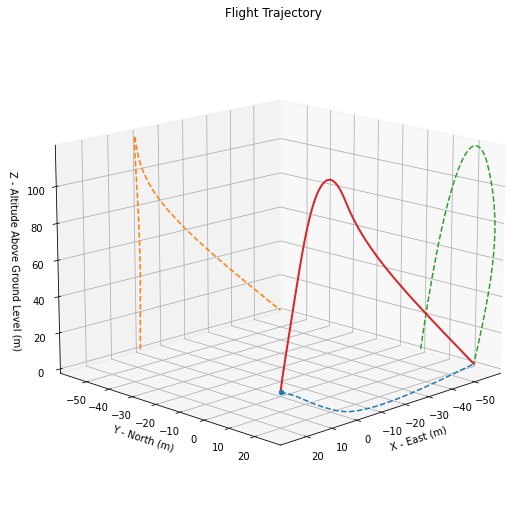



Trajectory Kinematic Plots



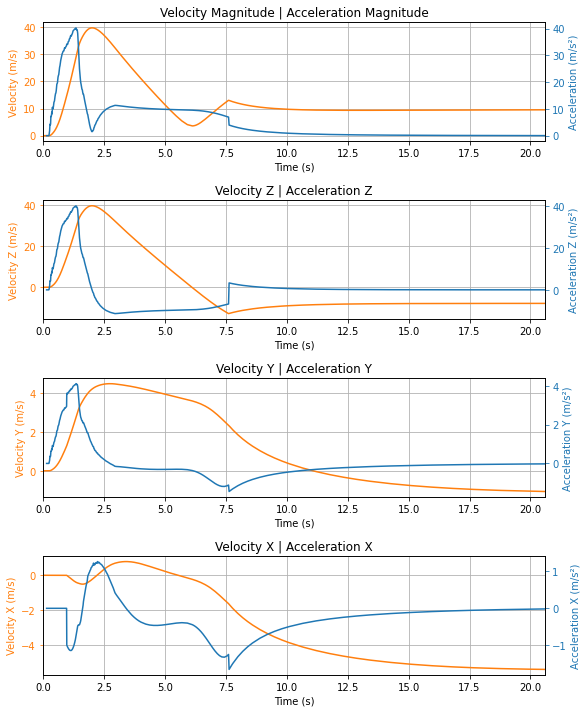



Angular Position Plots



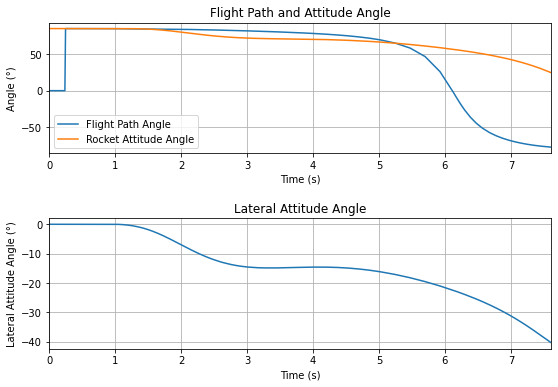



Path, Attitude and Lateral Attitude Angle plots



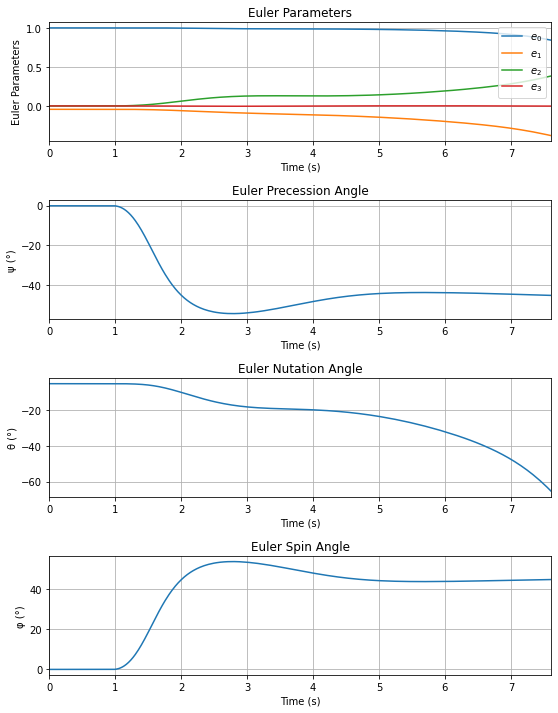



Trajectory Angular Velocity and Acceleration Plots



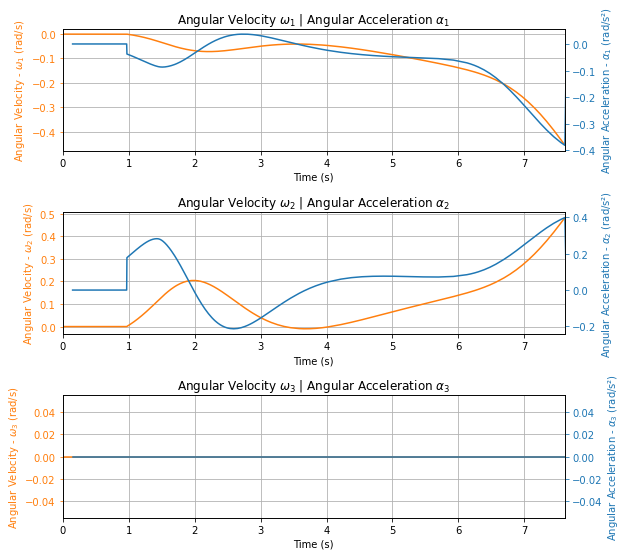



Trajectory Force Plots



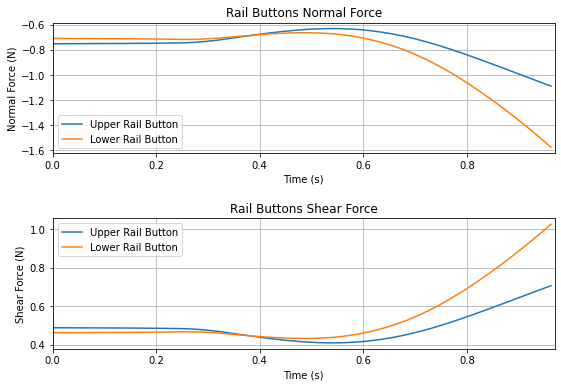

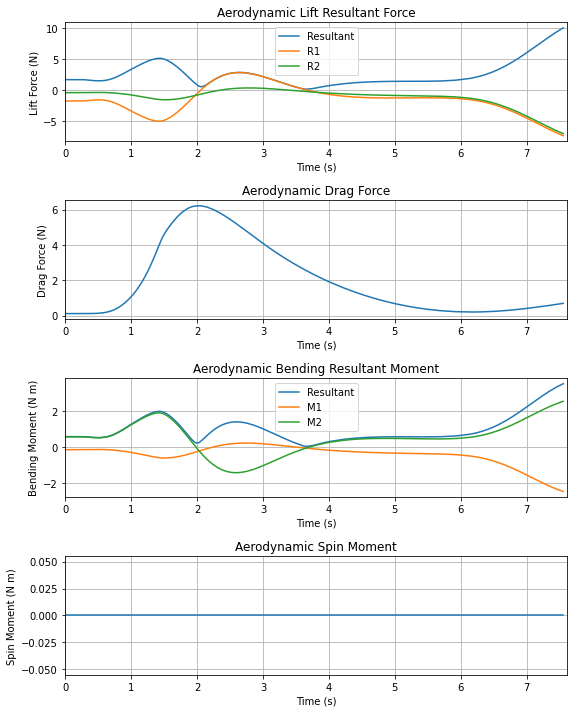



Trajectory Energy Plots



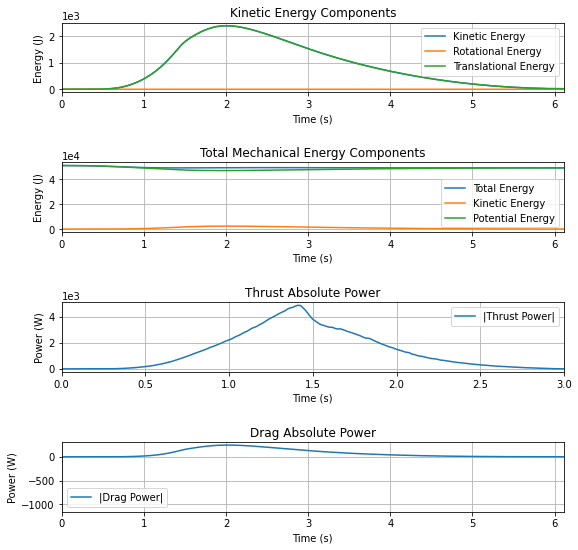



Trajectory Fluid Mechanics Plots



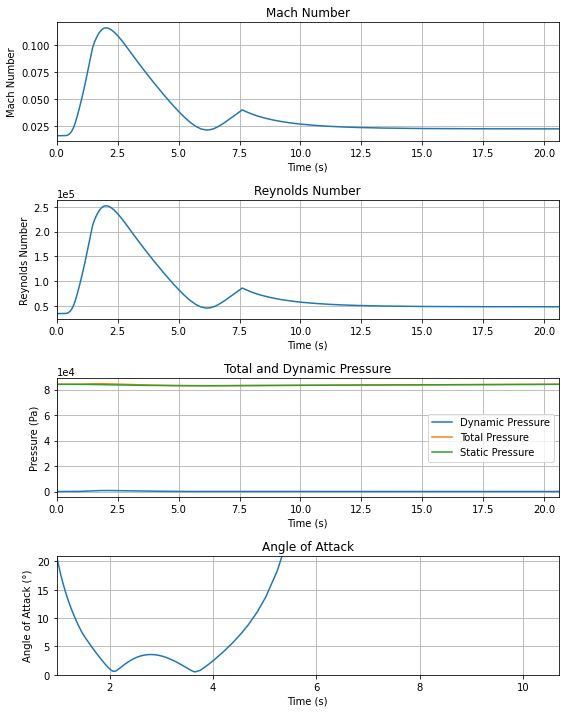



Trajectory Stability and Control Plots



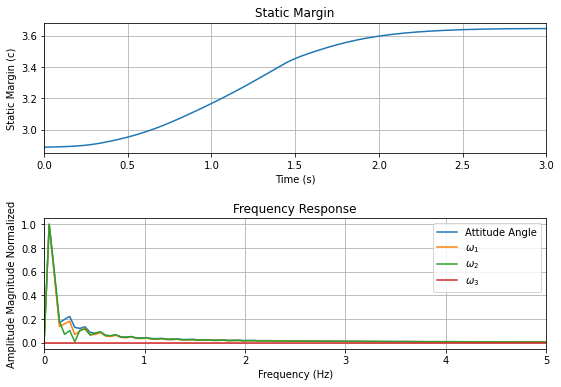

In [88]:
TestFlight.allInfo()